observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans


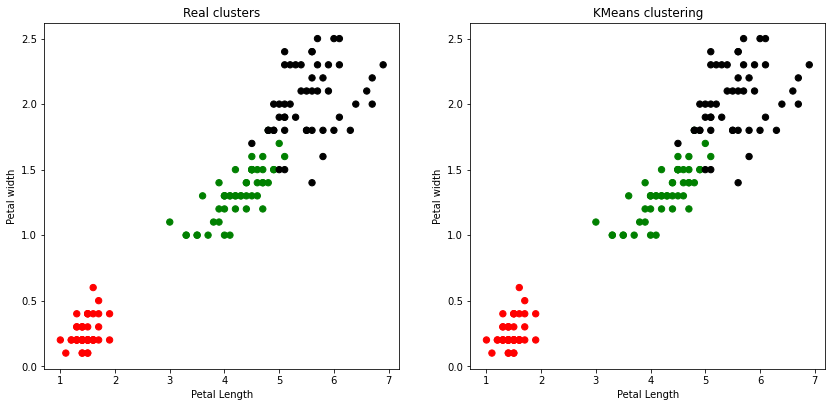

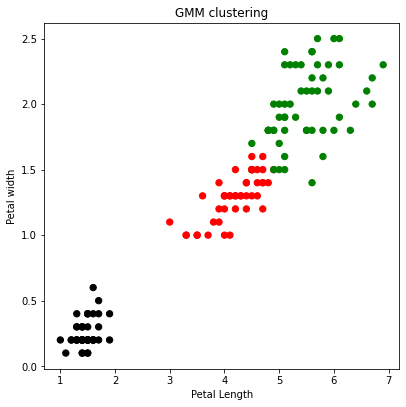

In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

#import some data to analyse with
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length', 'Sepal_width', 'Petal_Length', 'Petal_width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

#Build the K means model
model = KMeans(n_clusters=3)
model.fit(X)

#visualise the clustering results
plt.figure(figsize=(14,14))
colormap = np.array(['red', 'green', 'black'])

#plot the original classifications using petal features
plt.subplot(2, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_width, c=colormap[y.Targets], s=40)
plt.title('Real clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal width')

#plot model classifications
plt.subplot(2, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_width, c=colormap[y.Targets], s=40)
plt.title('KMeans clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal width')

#general Em for GMM
from sklearn import preprocessing
#transform your data such that it's distribution will have a mean value 0 and standard deviation of 1
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)

from sklearn.mixture import GaussianMixture
plt.figure(figsize=(14,14))
colormap = np.array(['red', 'green', 'black'])
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
gmm_y = gmm.predict(xs)
plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_width, c=colormap[gmm_y], s=40)
plt.title('GMM clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal width')

print('observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans')